<a href="https://colab.research.google.com/github/IagoSiccardi/Aprendizaje-Automatico/blob/main/1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo practico Introducción al aprendizaje automatico.

Grupo 2:
* Lautaro Quinteros Amicone | lauti.q.a@gmail.com
* Federico Melograna | F.melograna@hotmail.com
* Iago Siccardi | iago.siccardi@gmail.com

 El [Dataset](https://data.buenosaires.gob.ar/dataset/departamentos-venta/resource/juqdkmgo-7031-resource):

Relevamiento muestral en base a datos provistos por Argenprop de los avisos publicados para la venta de departamentos usados y a estrenar en el año 2016. Se detalla el valor de publicación, metros cuadrados, antigüedad, cantidad de ambientes, ubicación, entre otras variables.

In [ ]:
# @title
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# @title
df = pd.read_excel("/content/departamentos-en-venta-2016.xlsx")
df.info()

Tras un primer vistazo del dataset se clasificaron como variables de interes:

* operacion
* tipo
* m2
* dolares
* u_s_m2
* ambientes
* antiguedad
* baños
* barrio
* comuna
* latitud
* longitud


In [ ]:
# @title
columnas = [
    "operacion",
    "tipo",
    "m2",
    "dolares",
    "u_s_m2",
    "ambientes",
    "antiguedad",
    "baños",
    "barrio",
    "comuna",
    "latitud",
    "longitud"
]

df = df[columnas]

Ya filtrados los datos con estas variables de interes, el dataset resultante posee las siguientes caracteristicas:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7564 entries, 0 to 7563
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   operacion   7564 non-null   object 
 1   tipo        7564 non-null   object 
 2   m2          7564 non-null   int64  
 3   dolares     7564 non-null   int64  
 4   u_s_m2      7564 non-null   int64  
 5   ambientes   7564 non-null   int64  
 6   antiguedad  7564 non-null   int64  
 7   baños       7564 non-null   int64  
 8   barrio      6182 non-null   object 
 9   comuna      6182 non-null   float64
 10  latitud     6182 non-null   float64
 11  longitud    6182 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 709.3+ KB


De esta manera, observamos la presencia de datos nulos en ciertas variables categorícas, datos que podrían perjudicarnos con el avance del proyecto. Es por ello que decidimos eliminar aquellas filas con la presencia de valores nulos.

Finalmente, tras la modificación de los tipos de datos de las variables "comuna" y "barrio" el dataframe cuenta con **11 columnas** (4 categorícas y 7 numéricas) y **6182 filas**.

In [ ]:
# @title
df.dropna(inplace=True)
df.comuna = df.comuna.astype(int)
df.barrio = df.barrio.astype(str)
df.info()

Profundizamos en los datos evaluando si se trataba de un problema balanceado y tambien observamos la distribución de una variable de nuestro interes tal como es el precio por $m^2$.

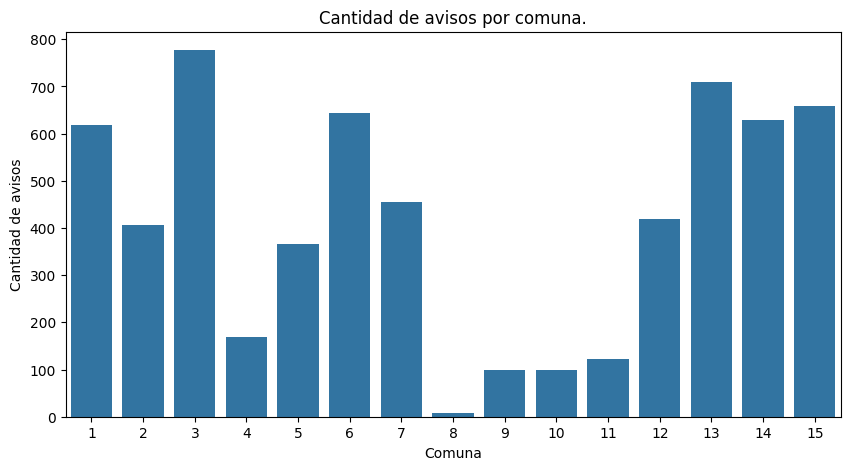

In [ ]:
# @title
plt.figure(figsize=(10, 5))
sns.barplot(x=df.comuna.value_counts().index, y=df.comuna.value_counts())
plt.title("Cantidad de avisos por comuna.")
plt.xlabel("Comuna")
plt.ylabel("Cantidad de avisos")
plt.show()

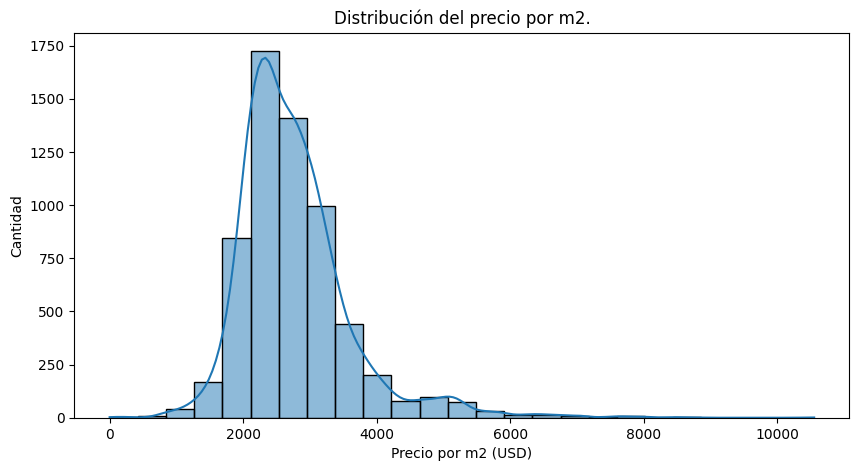

In [ ]:
# @title
plt.figure(figsize=(10, 5))
sns.histplot(x=df["u_s_m2"], bins=25, kde=True)
# sns.kdeplot(df["u_s_m2"], shade=True)
plt.title("Distribución del precio por $m^2$.")
plt.xlabel("Precio por $m^2$ (USD)")
plt.ylabel("Cantidad")
plt.show()

La variable Target sera el precio de los departamentos e intentaremos responder con el desarrolo de este proyecto: **¿Cuál será el precio de una propiedad según sus distintas caracteristicas?**

Dada la pregunta de investigación estaremos hablando de un problema de regresión ya que la variable que queremos explicar es numerica y continua, y a partir del analisis del dataframe creemos que las variables "**$m^2$**" y "**barrio**" tendran mayor peso en la cotización final de la propiedad y las metricas que utilizaremos para evaluar nuestros modelos serán el $R^2$ con el objetivo de observar cuanto tiene que ver las modificación de la variable independiente sobre la variable dependiente y por otro lado, el RMSE que nos permitíra evaluar las distancias entre las predicciones obtenidas y los datos reales.  



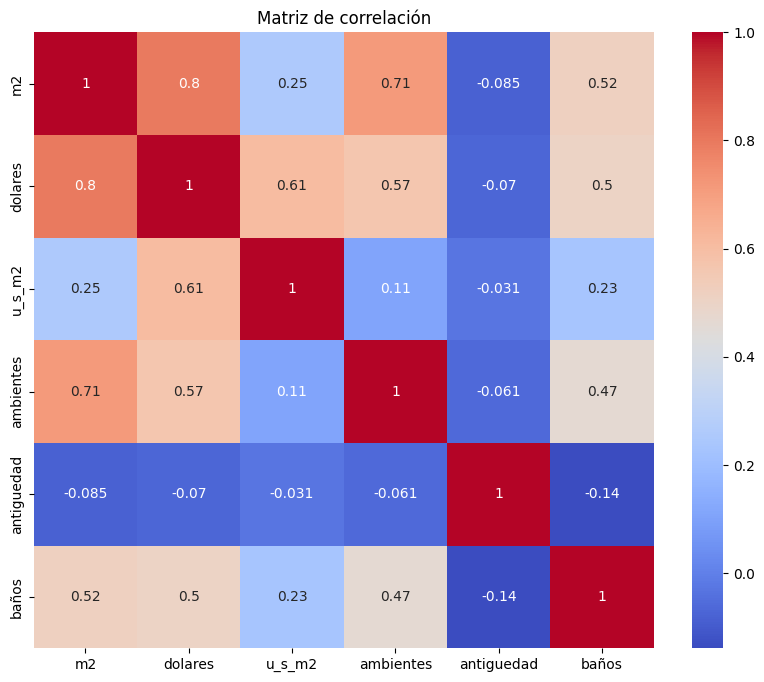

In [ ]:
# @title

matriz_correlacion = df[["m2", "dolares", "u_s_m2", "ambientes", "antiguedad", "baños"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

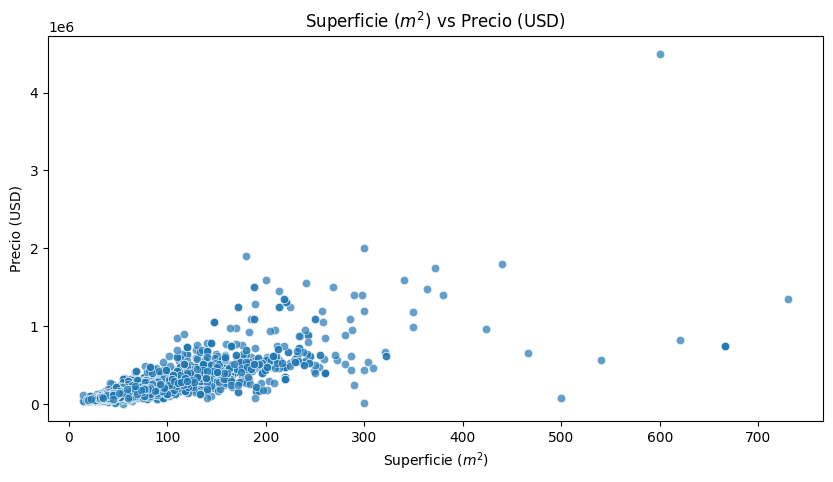

In [ ]:
# @title
plt.figure(figsize=(10, 5))
sns.scatterplot(x="m2", y="dolares", data=df, alpha=0.7)
plt.title("Superficie ($m^2$) vs Precio (USD)")
plt.xlabel("Superficie ($m^2$)")
plt.ylabel("Precio (USD)")
plt.show()